<a href="https://colab.research.google.com/github/ankitsrm/FileImportFilenetP8/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

df = pd.read_csv('/content/place.csv')

In [ ]:
df.head()

In [ ]:
df.shape


(100, 4)

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
#Steps to be done hear

#0. Preprocess + EDA + Feature Selection
#1. Extract input and output cols
#2. Scale the values
#3. Train test Split
#4. Train the model
#5. Evalute the model/model selection
#6. Deploy the model

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [10]:
import matplotlib.pyplot as plt

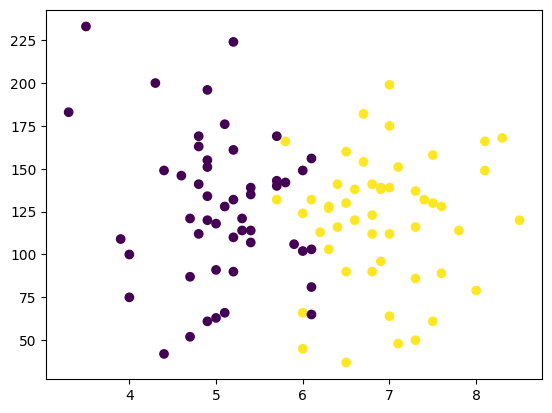

In [12]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

# **Extract input and output columns **

In [13]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

x -- is 2d matrix

y -- is 1d matrix

In [16]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [17]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

# Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1 ) # x and y mai se 10% data test mai jayege 90% train mai chal jayega

In [20]:
x_train

,cgpa,iq
50,3.5,233.0
40,4.9,134.0
90,7.3,86.0
63,6.3,128.0
21,7.1,151.0
...,...,...
41,5.4,114.0
67,5.0,118.0
51,4.8,141.0
30,7.6,128.0


In [21]:
y_train

50    0
40    0
90    1
63    1
21    1
     ..
41    0
67    0
51    0
30    1
73    0
Name: placement, Length: 90, dtype: int64

In [22]:
x_test

,cgpa,iq
52,7.0,175.0
34,4.8,163.0
56,6.1,65.0
77,7.3,50.0
75,4.8,169.0
99,6.2,113.0
11,6.9,138.0
66,6.9,96.0
70,6.3,127.0
22,4.9,120.0


In [23]:
y_test

52    1
34    0
56    0
77    1
75    0
99    1
11    1
66    1
70    1
22    0
Name: placement, dtype: int64

# Scale the value

scaling all time not needed

In [26]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [30]:
x_train = scaler.fit_transform(x_train)

In [ ]:
x_train

In [32]:
x_test = scaler.transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


# Train Model

In [33]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [34]:
clf.fit(x_train, y_train)

LogisticRegression()

# Evalute the Model

Mostly we take accuracy in test wala data


In [37]:
y_pred = clf.predict(x_test)

In [38]:
y_test

52    1
34    0
56    0
77    1
75    0
99    1
11    1
66    1
70    1
22    0
Name: placement, dtype: int64

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test,y_pred)

0.6

In [41]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

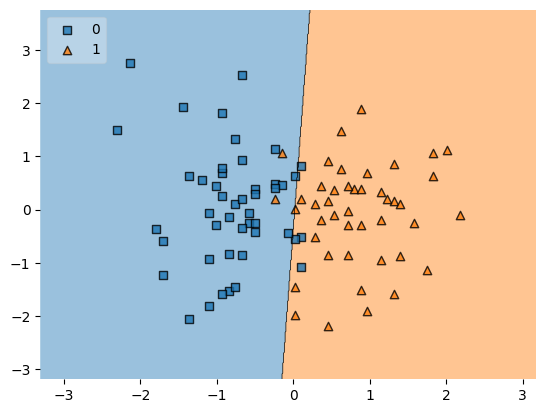

In [43]:
plot_decision_regions(x_train,y_train.values,clf=clf, legend=2)

In [44]:
import pickle

pickle python ke sare object ko kise bhi file mai dump kardeta hai and then we can use it anywhere

In [45]:
pickle.dump(clf,open('model.pk1','wb'))